In [50]:
def plot_loan_status_outliers(data, col, status_col='loan_status'):
    """
    Detect outliers in the age column of the dataframe using IQR,
    then plot the loan status distribution among those outliers.

    Parameters:
    - data: pandas DataFrame containing the data
    - col: str, name of the column with ages (default 'person_age')
    - status_col: str, name of the column with loan status (default 'loan_status')
    """
    # Calculate Q1 and Q3
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    print(f"Upper bound: {upper_bound}")
    print(f"Number of outliers: {len(outliers)}")

    # Calculate loan status percentages within outliers
    loan_status_pct = outliers[status_col].value_counts(normalize=True)

    # Plot pie chart
    plt.figure(figsize=(6,6))
    loan_status_pct.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
    plt.title('Loan Status Distribution in the Outliers', fontsize=14, fontweight='bold')
    plt.ylabel('')  # Hide y-label for a cleaner look
    plt.show()

# EDA

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [83]:
original_data=pd.read_csv('credit_risk_dataset.csv')

In [84]:
# Get numeric columns
numeric_columns = original_data.select_dtypes(include=[np.number]).columns.tolist()
len(numeric_columns)

8

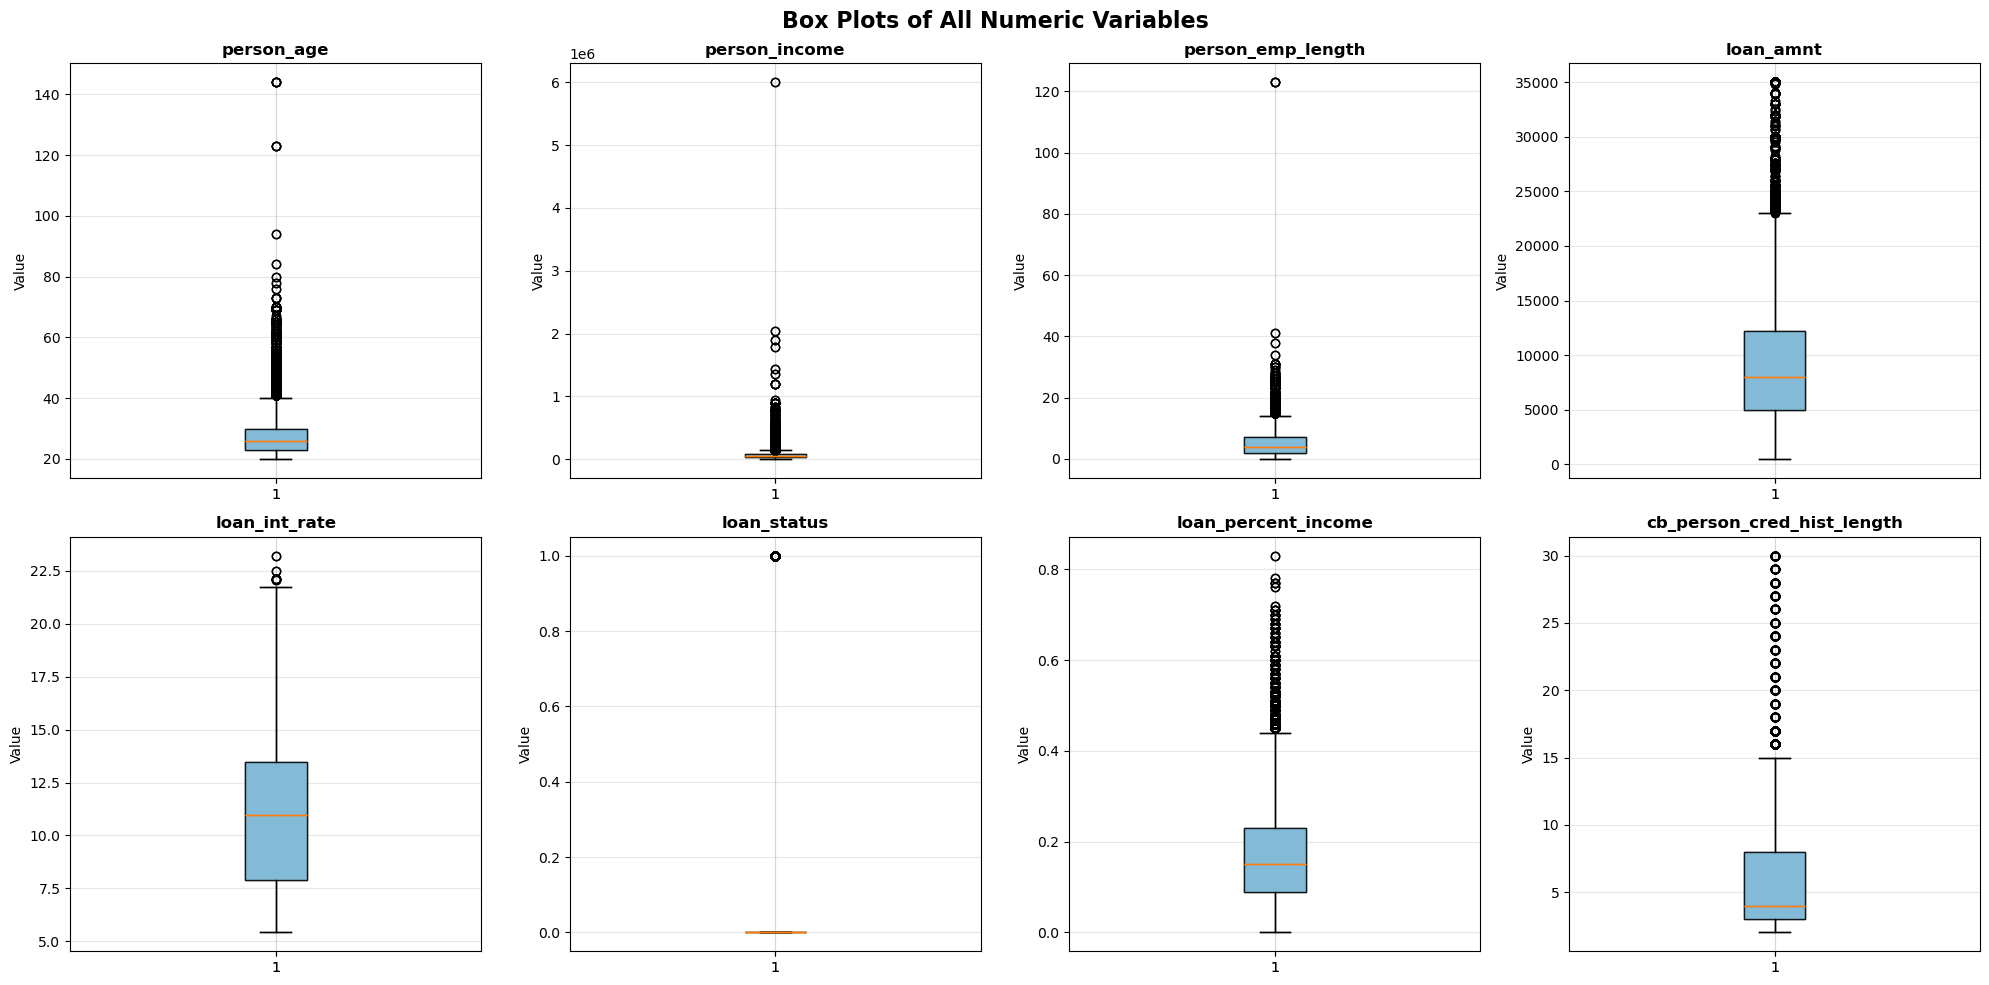

In [85]:
# Create box plots for all numeric variables
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Box Plots of All Numeric Variables', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    if i < len(axes):
        axes[i].boxplot(original_data[col].dropna(), patch_artist=True)
        axes[i].set_title(col, fontweight='bold')
        axes[i].set_ylabel('Value')
        axes[i].grid(True, alpha=0.3)
        
        # Add some styling
        bp = axes[i].boxplot(original_data[col].dropna(), patch_artist=True)
        for patch in bp['boxes']:
            patch.set_facecolor('lightblue')
            patch.set_alpha(0.7)

# Hide any unused subplots
for i in range(len(numeric_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

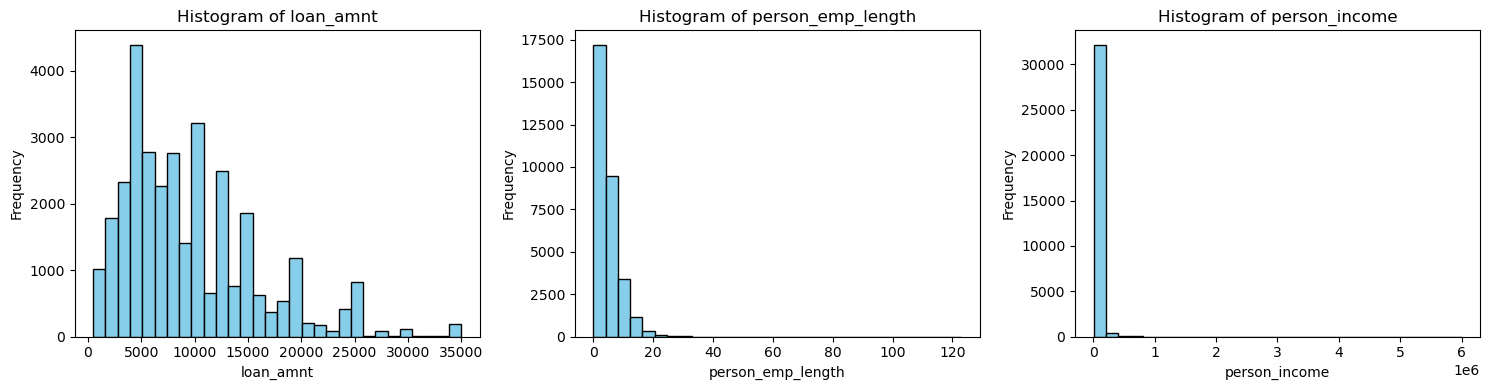

In [86]:
lt = ['loan_amnt', 'person_emp_length', 'person_income']

# Set up the plot
plt.figure(figsize=(15, 4))

for i, col in enumerate(lt):
    plt.subplot(1, 3, i + 1)
    plt.hist(original_data[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [87]:
mask = (
    (original_data['person_age'] > 85) |
    (original_data['person_income'] > 1000000) |
    (original_data['person_emp_length'] > 50)
)
data=original_data[~mask]

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32565 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32565 non-null  int64  
 1   person_income               32565 non-null  int64  
 2   person_home_ownership       32565 non-null  object 
 3   person_emp_length           31670 non-null  float64
 4   loan_intent                 32565 non-null  object 
 5   loan_grade                  32565 non-null  object 
 6   loan_amnt                   32565 non-null  int64  
 7   loan_int_rate               29453 non-null  float64
 8   loan_status                 32565 non-null  int64  
 9   loan_percent_income         32565 non-null  float64
 10  cb_person_default_on_file   32565 non-null  object 
 11  cb_person_cred_hist_length  32565 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [89]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32565.000000,32565.000000,31670.000000,32565.000000,29453.000000,32565.000000,32565.000000,32565.000000
mean,27.712022,65523.655765,4.781749,9588.411638,11.011879,0.218240,0.170239,5.800798
std,6.186615,47103.334765,4.034418,6320.861946,3.240469,0.413058,0.106737,4.048004
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,38500.000000,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,79200.000000,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,84.000000,948000.000000,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [90]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


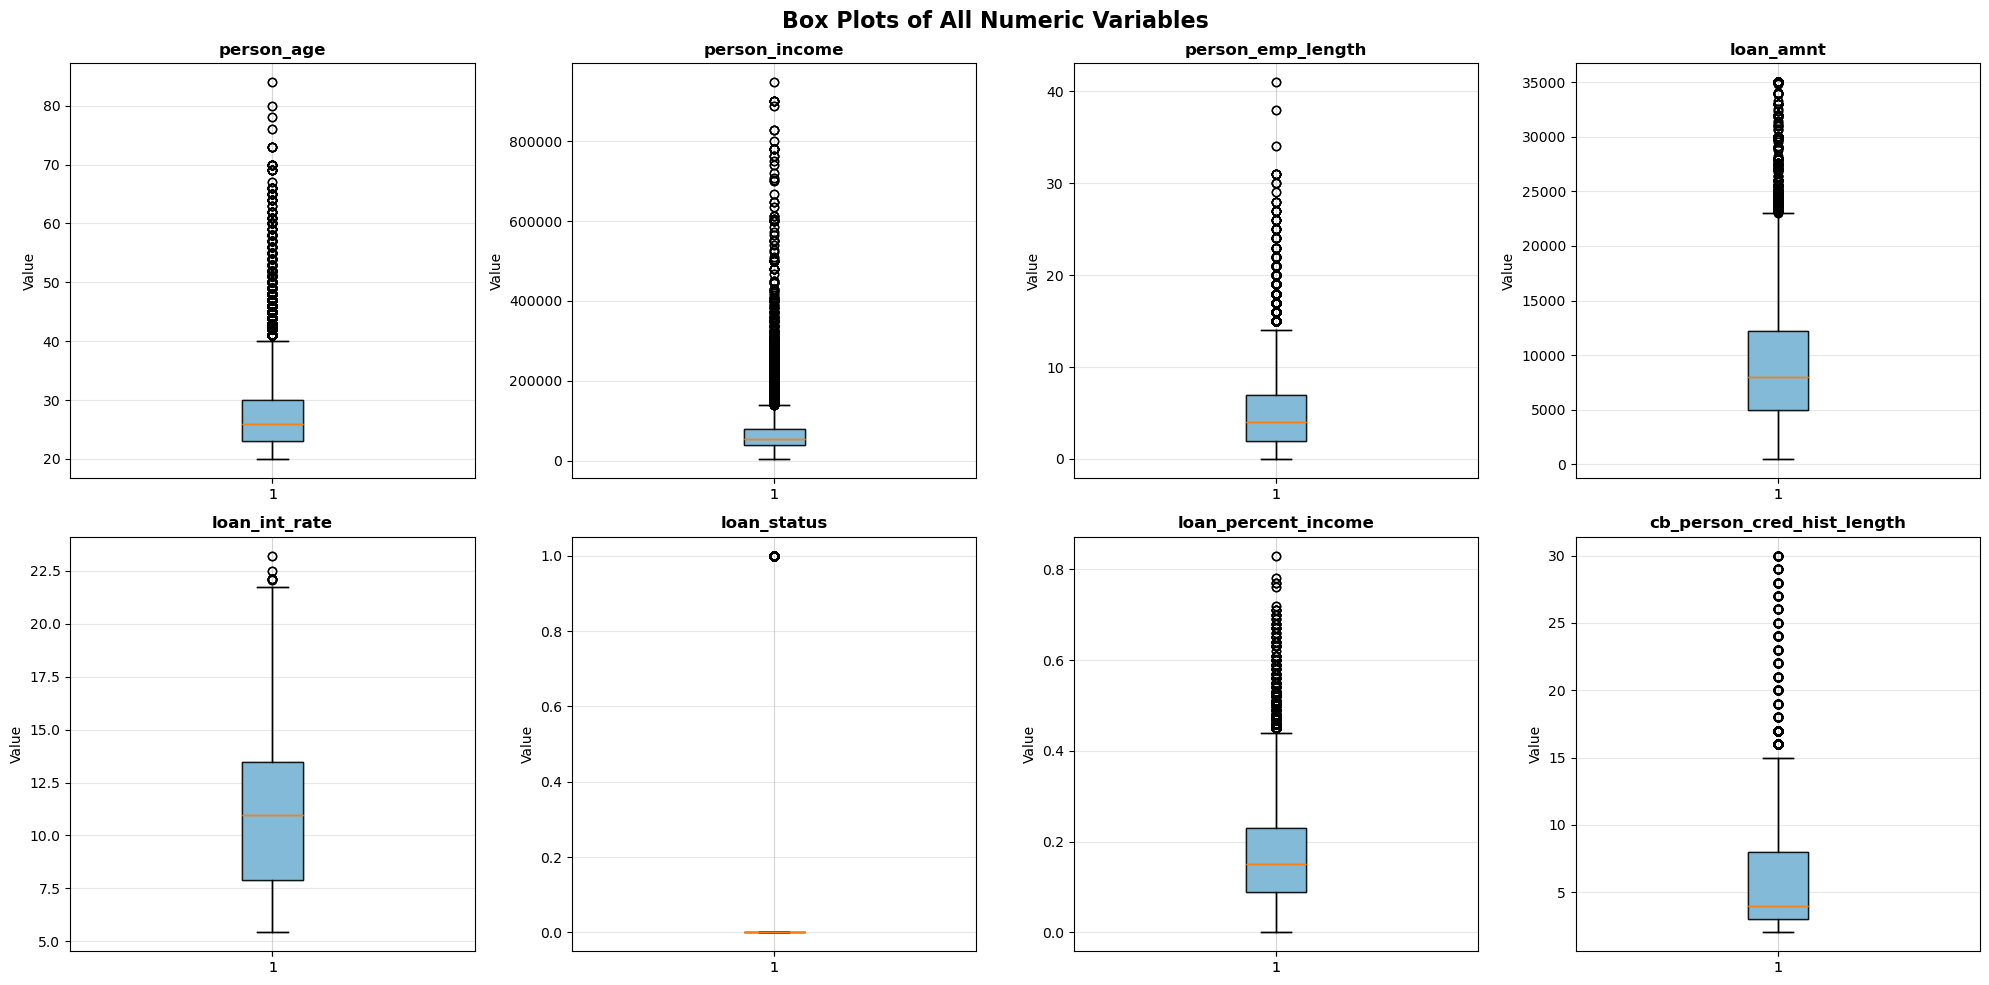

In [91]:
# Create box plots for all numeric variables
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Box Plots of All Numeric Variables', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    if i < len(axes):
        axes[i].boxplot(data[col].dropna(), patch_artist=True)
        axes[i].set_title(col, fontweight='bold')
        axes[i].set_ylabel('Value')
        axes[i].grid(True, alpha=0.3)
        
        # Add some styling
        bp = axes[i].boxplot(data[col].dropna(), patch_artist=True)
        for patch in bp['boxes']:
            patch.set_facecolor('lightblue')
            patch.set_alpha(0.7)

# Hide any unused subplots
for i in range(len(numeric_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


Note: otliers in person_income; Person age limit to 100; 

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32565 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32565 non-null  int64  
 1   person_income               32565 non-null  int64  
 2   person_home_ownership       32565 non-null  object 
 3   person_emp_length           31670 non-null  float64
 4   loan_intent                 32565 non-null  object 
 5   loan_grade                  32565 non-null  object 
 6   loan_amnt                   32565 non-null  int64  
 7   loan_int_rate               29453 non-null  float64
 8   loan_status                 32565 non-null  int64  
 9   loan_percent_income         32565 non-null  float64
 10  cb_person_default_on_file   32565 non-null  object 
 11  cb_person_cred_hist_length  32565 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


person_age
Upper bound: 40.5
Number of outliers: 1483


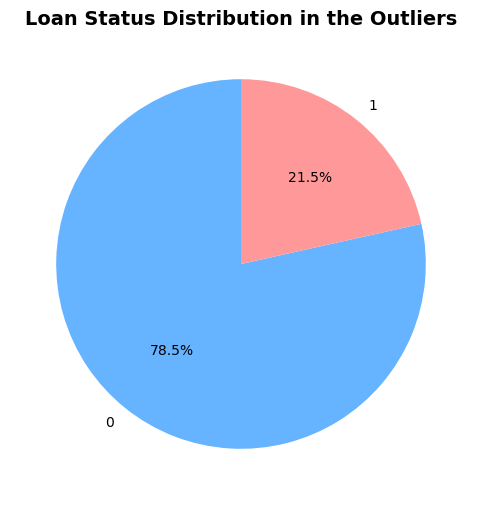

person_income
Upper bound: 140250.0
Number of outliers: 1472


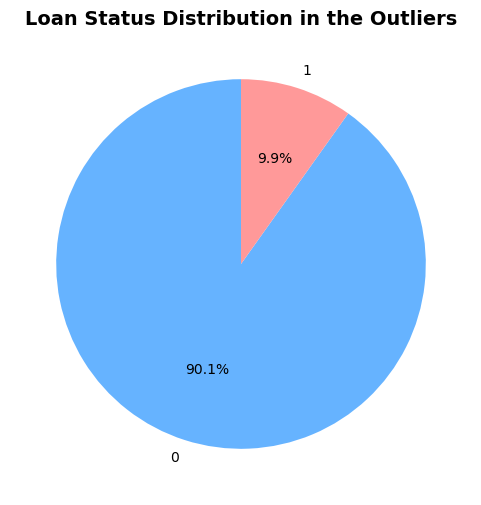

person_emp_length
Upper bound: 14.5
Number of outliers: 850


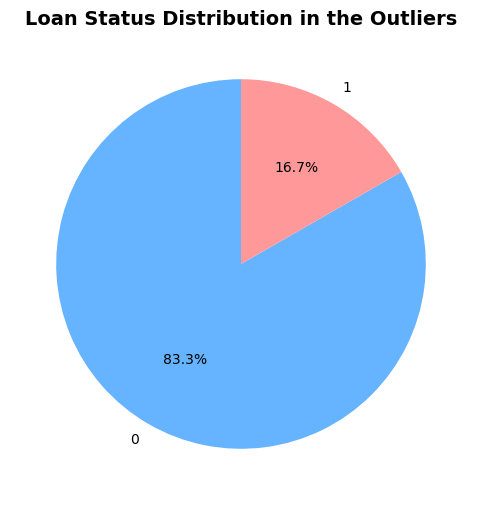

loan_amnt
Upper bound: 23000.0
Number of outliers: 1688


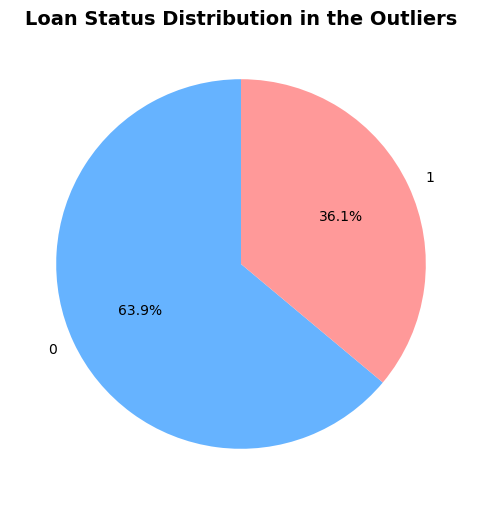

loan_percent_income
Upper bound: 0.44000000000000006
Number of outliers: 650


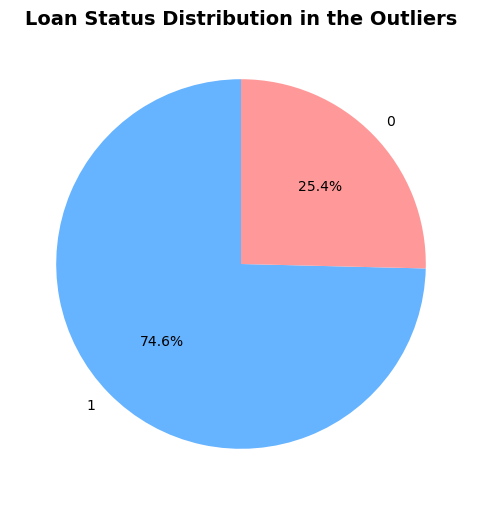

cb_person_cred_hist_length
Upper bound: 15.5
Number of outliers: 1136


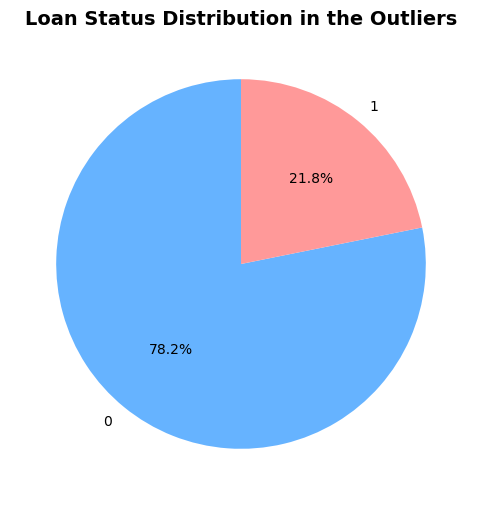

In [93]:
for i in ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_percent_income', 'cb_person_cred_hist_length']:
    print(i)
    plot_loan_status_outliers(data, i , status_col='loan_status')

outliers with similar target distribution:
If the outliers have a target variable distribution similar to the whole dataset, it means these outliers are representative of the overall data pattern.
So keeping them is reasonable — they provide valid information and won't bias your model.

clients outliers with different target distribution:
If the outliers for rich clients show a target distribution significantly different from the overall dataset, it means these samples may behave differently or represent a distinct subgroup.
Removing or treating them differently can help your model avoid bias or overfitting on a small but different subset.



lt = ['loan_amnt', 'person_emp_length', 'person_income']

# Set up the plot
plt.figure(figsize=(15, 4))

for i, col in enumerate(lt):
    plt.subplot(1, 3, i + 1)
    plt.hist(data[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

loan_amnt left skwed transformaion

pernson_emp_leght cut at 20



In [14]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [19]:
# Get categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
len(categorical_columns)

4

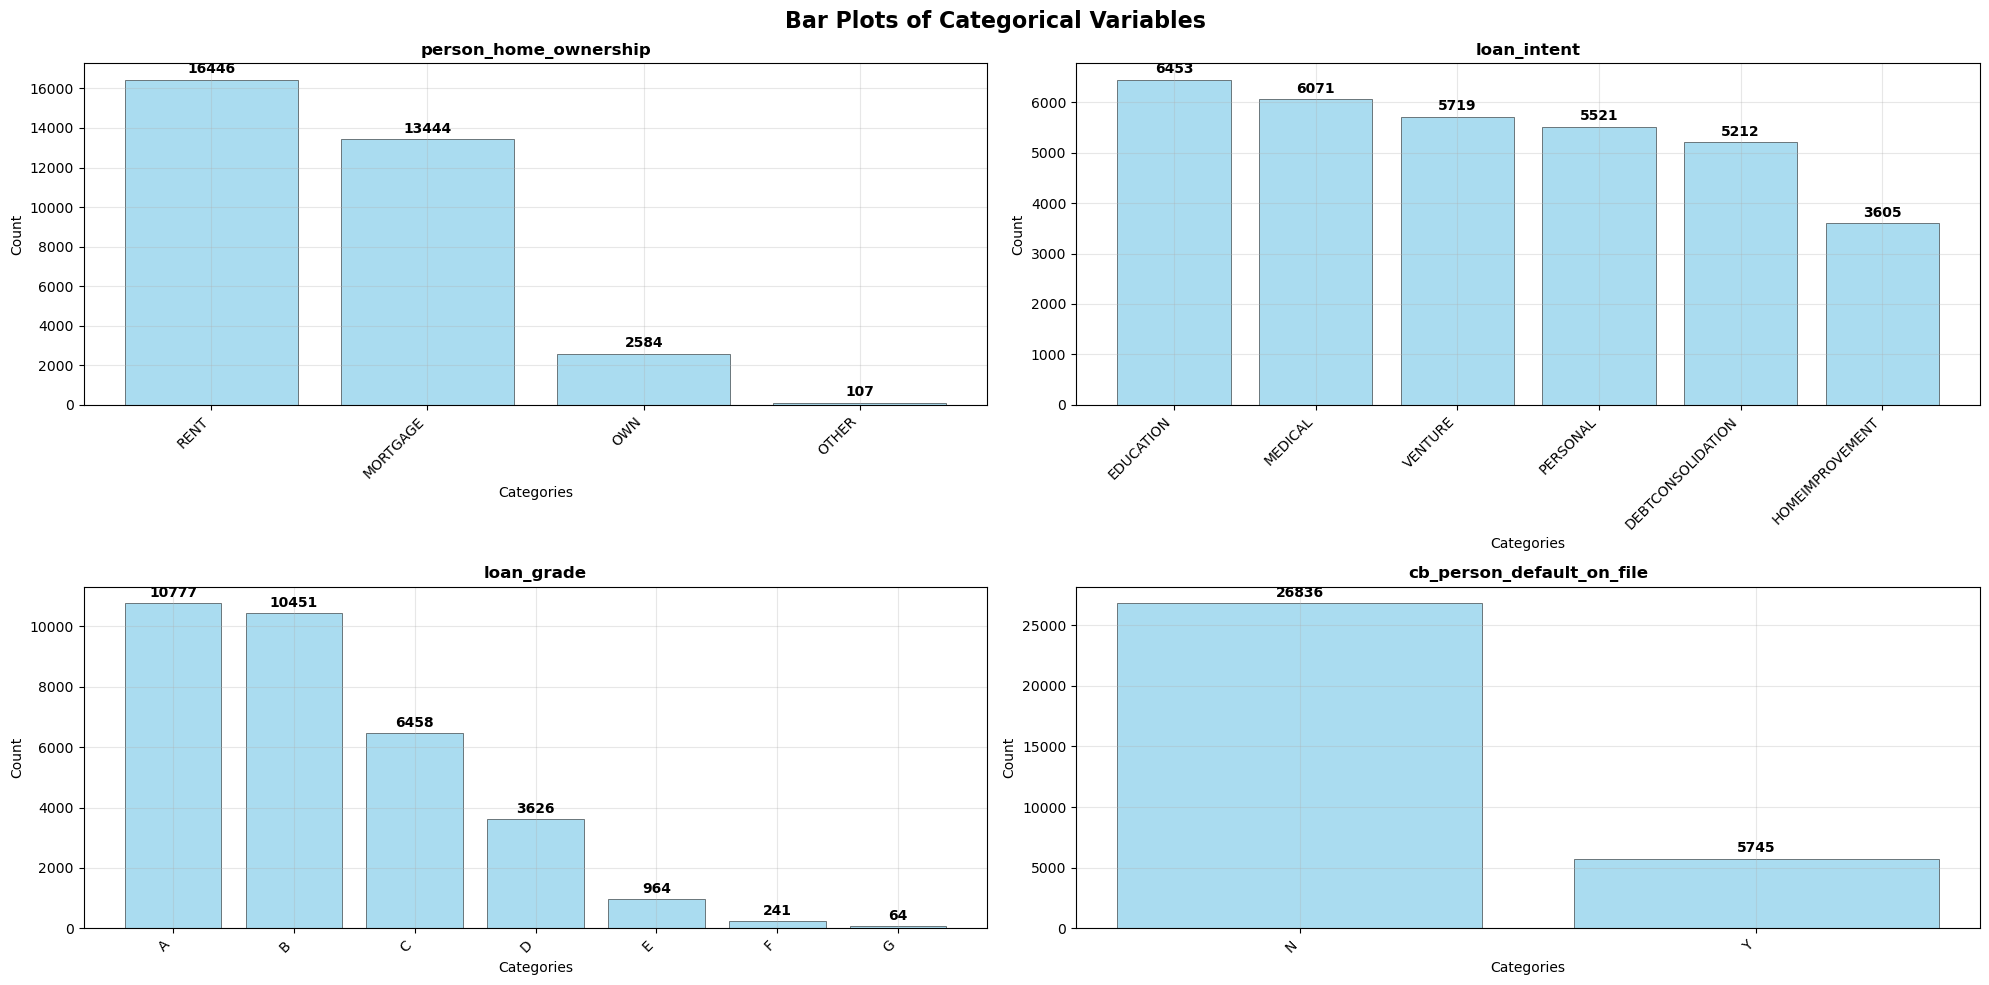

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle('Bar Plots of Categorical Variables', fontsize=16, fontweight='bold')
axes = axes.flatten()
    
for i, col in enumerate(categorical_columns):
        if i < len(axes):
            # Count values and plot
            value_counts = data[col].value_counts()
            axes[i].bar(range(len(value_counts)), value_counts.values, 
                       color='skyblue', alpha=0.7, edgecolor='black', linewidth=0.5)
            axes[i].set_title(f'{col}', fontweight='bold', fontsize=12)
            axes[i].set_xlabel('Categories')
            axes[i].set_ylabel('Count')
            axes[i].grid(True, alpha=0.3)
            
            # Set x-axis labels
            axes[i].set_xticks(range(len(value_counts)))
            axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
            
            # Add value labels on bars
            for j, v in enumerate(value_counts.values):
                axes[i].text(j, v + max(value_counts.values)*0.01, str(v), 
                           ha='center', va='bottom', fontweight='bold')
    
    # Hide unused subplots
for i in range(len(categorical_columns), len(axes)):
        axes[i].set_visible(False)
    
plt.tight_layout()
plt.show()

Note: loan grades ordinal data

In [18]:
data['loan_status'].value_counts(normalize=True) * 100

loan_status
0    78.183604
1    21.816396
Name: proportion, dtype: float64

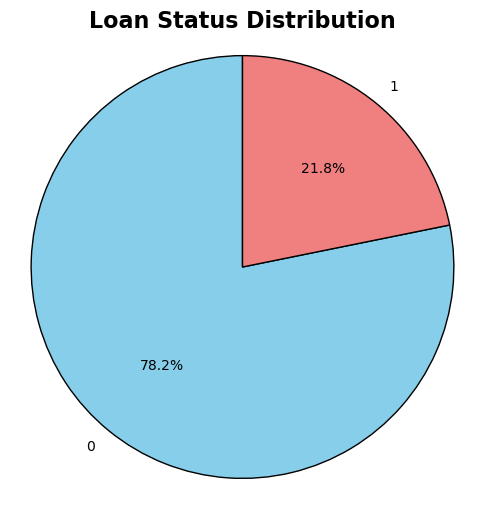

In [25]:
counts = data['loan_status'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, 
        colors=['skyblue', 'lightcoral'], wedgeprops={'edgecolor': 'black'})
plt.title('Loan Status Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio to make the pie circular
plt.show()



In [41]:
print(pd.crosstab(data['person_home_ownership'], [data['loan_status'], data['loan_grade']]))

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27  


In [42]:
print(pd.crosstab(data['cb_person_default_on_file'], [data['loan_status'], data['loan_grade']]))

loan_status                   0                                  1             \
loan_grade                    A     B     C    D    E   F  G     A     B    C   
cb_person_default_on_file                                                       
N                          9704  8750  2504  736  169  37  0  1073  1701  698   
Y                             0     0  2615  749  174  34  1     0     0  641   

loan_status                                   
loan_grade                    D    E   F   G  
cb_person_default_on_file                     
N                          1014  330  92  28  
Y                          1127  291  78  35  
